# Covered here

- [Mathematical background](#Mathematical-background)
- [Logistic regression in `sklearn`](#Logistic-regression-in-sklearn)

# Resources & references

`sklearn`:

- [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) estimator
- [Pipelining: chaining a PCA and a logistic regression](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py)
- [Logistic function](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py)
- [Generalized linear models: logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [L1 Penalty and Sparsity in Logistic Regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py)

PSU:

- [Introduction to Generalized Linear Models](https://onlinecourses.science.psu.edu/stat504/node/216)
- [Binary Logistic Regression with a Single Categorical Predictor](https://onlinecourses.science.psu.edu/stat504/node/150)

Other:

- UCLA: [Logit Regression: R Data Analysis Examples](https://stats.idre.ucla.edu/r/dae/logit-regression/)
- aedsayad.com: [Logistic Regression](http://www.saedsayad.com/logistic_regression.htm)
- yhat: Logistic regression in Python[](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html)
- Medium: [Building A Logistic Regression in Python, Step by Step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)
- CMU: [Logistic regression](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)
- Standford: [Logistic regression](http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/)
- Metis [slides](https://github.com/thisismetis/nyc18_ds14/blob/master/class_lectures/week04-mcnulty1/02-logistic_sql_load/logistic.pdf)

# Mathematical background

Before getting into anything about logistic _regression_, there are two relevant and more general _functions_:
1. Logistic function
2. Logit function

## Logistic function

A **logistic function** or logistic curve is a common "S" shape (sigmoid curve), with equation:

$$f(x) = \frac{L}{1+e^{-k(x-x_0)}}$$

where:

- $x_0$ = the x-value of the sigmoid's midpoint,
- $L$ = the curve's maximum value, and
- $k$ = the steepness of the curve.

As it applies to logistic regression, we can simplifiy this to the case of the **standard logistic function** where $L=1.0$, $x_0=0$, and $k=1$:

$$f(x) = \frac{1}{1+e^{-x}}$$


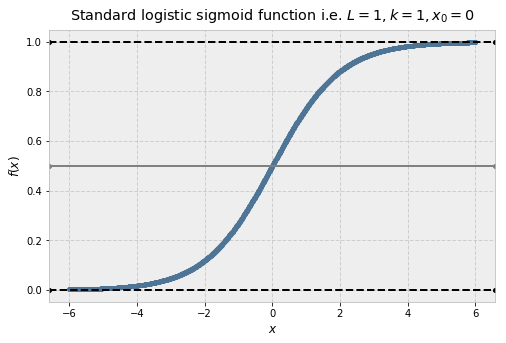

In [1]:
def logistic_func(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k * (x - x0)))

x = np.linspace(-6, 6, 1200)
plt.plot(x, logistic_func(x))
plt.title(r'Standard logistic sigmoid function i.e. $L=1,k=1,x_0=0$');
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.axhline(.5, color='.5')
plt.axhline(1.0, color='black', linestyle='--')
plt.axhline(0.0, color='black', linestyle='--');

## Logit function

The logistic function is the inverse of the natural **logit function** and so **can be used to convert the logarithm of odds into a probability**.

$$logit(z) = \ln{\frac{z}{1 - z}}$$

Here, $z$ is our probability' $\frac{z}{1 - z}$ are the odds, and $\ln{\frac{z}{1 - z}}$ are the log odds.

## Logistic regression

- Logistic regression, despite its name, is a **linear model for classification rather than regression**. 
- Also known as logit regression, maximum-entropy classification (MaxEnt), or the log-linear classifier.
- Binary logistic regression estimates the probability that a characteristic is present (success), based on combinations of values taken by the predictors.  
    - **It assumes a linear relationship between the logit of the response and the explanatory variables**.  (More below.)

## Assumptions about response variable

$y$ is the binary response variable:

$$y_i = 1 --> success \text{ (presence of trait)}$$

$$y_i = 0 --> failure \text{ (absence of trait)} $$

$y$ is assumed to have a binomial distribution and be i.i.d.

## Model

In linear regression, we are trying to _learn_ a function of the form 

$$y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$$

In logistic regression, we are trying to learn:

$$logit(\pi) = \ln{\frac{\pi}{1 - \pi}} = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$$

The above models the **log odds of probability of "success" as a function of explanatory variables**.

$\pi_i$ is the probability of success for a given sample's response: 

$$\pi_i = P(y_i = 1|X_i=x_i)$$
$$ \text{side note:} P(y = 1) = E[Y]$$


**How did we get to this?** The easiest way to see why we've done this transformation is to consider why the usual linear regression formulation does _not_ work for predicting the value of a binary variable:

1. The most obvious idea is to let $p(x)$ be a linear function of $x$. Every increment of a component of $x$ would add or subtract so much to the probability. **The conceptual problem here is that $p$ must be between 0 and 1, and linear functions are unbounded.** Moreover, in many situations we empirically see “diminishing returns” — changing $p$ by the same amount requires a bigger change in $x$ when $p$ is already large (or small) than when $$ is close to 1/2. Linear models can’t do this.
2. The next most obvious idea is to let $p(x)$ be a linear function of $x$, so that changing an input variable multiplies the probability by a fixed amount. **The problem is that logarithms are unbounded in only one direction, and linear functions are not.**

That brings us to the third and correct transoformation, to make $\ln\frac{p}{1-p}$ be a linear function of $x$.  This is exactly what we are doing in the above equation.

So, solving for $\pi_i$:

$$\pi_i = P(y_i=1|X_i=x_i) = \frac{e^{\beta_0 + \beta_1X_1 + ... + \beta_nX_n}}{1 + e^{\beta_0 + \beta_1X_1 + ... + \beta_nX_n}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + ... + \beta_nX_n)}}$$

Keep in mind that with the equation in its final form here, we are talking simply about **probability rather than log odds.**

To minimize the mis-classification rate, we should predict $Y = 1$ when $p \geq 0.5$ and $Y = 0$ when $p < 0.5$. This means guessing 1 whenever $\beta_0 + x \dot \beta_1$ is non-negative, and 0 otherwise. So logistic regression gives us a linear classifier. The decision boundary separating the two predicted classes is the solution of $\beta_0 + x \dot \beta_1 = 0$, which is a point if $x$ is one dimensional, a line if it is two dimensional

# Interpreting parameter estimates

In the logistic regression,
- the constant ($\beta_0$) moves the curve left and right;
- the slope(s) ($\beta_1$) defines the steepness of the curve.  The coefficient ($\beta_1$) is the amount the logit (log-odds) changes with a one unit change in $x$. 

TODO: See https://onlinecourses.science.psu.edu/stat504/node/150

# Logistic regression in `sklearn`

The two most common linear classification algorithms are logistic regression, implemented in `sklearn.linear_model.LogisticRegression`, and linear support vector machines (linear SVMs), implemented in `sklearn.svm.LinearSVC` (SVC stands for support vector classifier).  

From the sklearn docs:

- [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) estimator
- [Pipelining: chaining a PCA and a logistic regression](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py)
- [Logistic function](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py)
- [Generalized linear models: logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [L1 Penalty and Sparsity in Logistic Regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html#sphx-glr-auto-examples-linear-model-plot-logistic-l1-l2-sparsity-py)

## Regularization parameter

By default, `LogisticRegression` applies an L2 regularization, in the same way that Ridge does for regression.  For LogisticRegression, the trade-off parameter that determines the strength of the regularization is called `C`, and **higher values of C correspond to _less_ regularization**.

The docstring for `C` (`float`, default 1.0) is:

> Inverse of regularization strength; must be a positive float. Like in support vector machines, **smaller values specify stronger regularization**.

In other words, $C$ is the inverse of $\alpha$ used in Ridge regression.  The ridge coefficients minimize a penalized residual sum of squares,

$$\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$$

where $w$ are the coefficients.  Here, $\alpha \geq 0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage.

In the case of `LogisticRegression`, `C` corresponds to $A^{-1}$.

As `C` goes to $\infty$, there is virtually no penalization.  As `C` goes to 0, $1/C$ goes to $\infty$ and the amount of penalization increases.

Here is the full cost function for binary class L2 penalized logistic regression:

$$\underset{w, c}{min\,} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$$

## Example - the logistic function

Modified from an [example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py) in the sklearn docs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression)

np.random.seed(444)

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)
X = X[:, np.newaxis]
print(X.ravel()[:5], '...')
print(y[:5], '...')

[ 1.8924  1.7601  5.9126  4.4879 -0.9774] ...
[ 1.  1.  1.  1.  0.] ...


Here's what our data looks like:

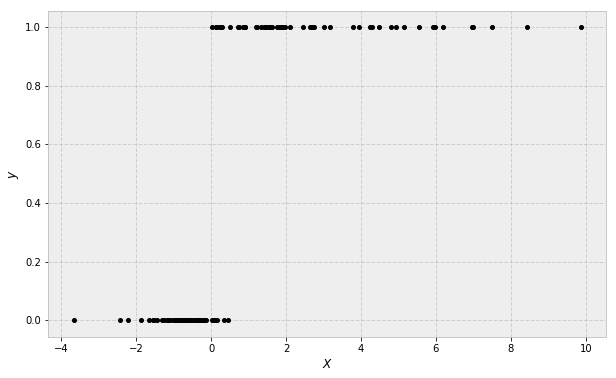

In [3]:
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
plt.ylabel('$y$')
plt.xlabel('$X$');

Now let's compare logistic and linear regression on this data set:

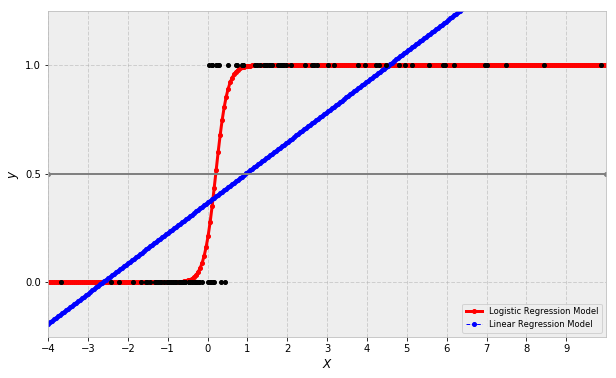

In [4]:
clf = LogisticRegression(C=1e5)  # big C --> no penalization
clf.fit(X, y)

plt.figure(1, figsize=(10, 6))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# 'z' here is a function of coefficients + X
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1, color='blue')
plt.axhline(.5, color='.5')

plt.ylabel('$y$')
plt.xlabel('$X$')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()

## Example: graduate school admission

Ported from R: https://stats.idre.ucla.edu/r/dae/logit-regression/

A researcher is interested in how variables, such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, effect admission into graduate school. The response variable, admit/don’t admit, is a binary variable.

This dataset has a binary response (outcome, dependent) variable called admit. There are three predictor variables: gre, gpa and rank. We will treat the variables gre and gpa as continuous. The variable rank takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

In [5]:
import pandas as pd

X = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv',
                names=['admit', 'gre', 'gpa', 'ranking'], header=0)
X.head()

,admit,gre,gpa,ranking
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
X = pd.get_dummies(X, columns=['ranking'], drop_first=True)
y = X.pop('admit')
X.head()

,gre,gpa,ranking_2,ranking_3,ranking_4
0,380,3.61,0,1,0
1,660,3.67,0,1,0
2,800,4.00,0,0,0
3,640,3.19,0,0,1
4,520,2.93,0,0,1


Always normalize X with logistic regression because regularization is involved:

In [7]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [8]:
# We'll compare to linear regression
logit = LogisticRegression(random_state=444).fit(X, y)
linear = LinearRegression(n_jobs=-1).fit(X, y)

`logit` here has three important attributes; the first two are self-explanatory and found in `LinearRegression`:

In [9]:
logit.coef_

array([[ 0.2585,  0.3006, -0.3042, -0.5878, -0.5534]])

In [10]:
logit.intercept_

array([-0.8392])

The third defines the class labels:

In [11]:
logit.classes_

array([0, 1])

`LogisticRegression` also has a few more methods than `LinearRegression`.  Among them:
- `predict(X)` - Predict _class labels_ for samples in X.  (Labels, not probabilities.)
- `predict_log_proba(X)` - Log of probability estimates.
- `predict_proba(X)` - Probability estimates.
- `score(X, y[, sample_weight])` - Returns the **mean accuracy** on the given test data and labels.  (This is not r-squared; it is [`sklearn.metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).)

But let's do things manually first.  From above:

$$logit(\pi) = \ln{\frac{\pi}{1 - \pi}} = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$$

$$\pi_i = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + ... + \beta_nX_n)}}$$

In [12]:
log_odds = logit.intercept_ + (X * logit.coef_).sum(axis=1)

In [13]:
def sigmoid(z):
    # Redefining from above
    return 1 / (1 + np.exp(-z))

# `prob` is our *logistic function* (sigmoid curve) here
prob = sigmoid(log_odds)

In [14]:
# Probability of *success* (1) for first 15 cases
prob[:15]

array([ 0.1768,  0.2967,  0.7293,  0.1839,  0.123 ,  0.3736,  0.4126,
        0.2209,  0.2053,  0.5191,  0.3797,  0.3936,  0.7113,  0.3571,
        0.6829])

In [15]:
pred = np.where(prob >= 0.5, 1., 0.)

Does this match predictions from sklearn?  Yes--

In [16]:
np.allclose(pred, logit.predict(X))

True

The output of `predict_proba(X)` and `predict_log_proba(X)` are actually 2d arrays:

In [17]:
logit.predict_proba(X)[:10]  # first 10 samples

array([[ 0.8232,  0.1768],
       [ 0.7033,  0.2967],
       [ 0.2707,  0.7293],
       [ 0.8161,  0.1839],
       [ 0.877 ,  0.123 ],
       [ 0.6264,  0.3736],
       [ 0.5874,  0.4126],
       [ 0.7791,  0.2209],
       [ 0.7947,  0.2053],
       [ 0.4809,  0.5191]])

Why is this?  This array is

> The returned estimates for all classes are ordered by the label of classes.  Returns the probability of the sample for **each class** in the model, where classes are ordered as they are in `self.classes_` [[source](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)]

In other words, column 1 above are probabilities for Failure (0), and column 2 are probabilities for Success (1).  This will become more useful with multilabel classification.  But for now, the first column of the above is equal to our manually defined `prob`:

In [18]:
np.allclose(prob, logit.predict_proba(X)[:, 1])

True

In [19]:
pd.DataFrame(logit.predict_proba(X), columns=logit.classes_).add_prefix('prob_of_').head(5)

,prob_of_0,prob_of_1
0,0.8232,0.1768
1,0.7033,0.2967
2,0.2707,0.7293
3,0.8161,0.1839
4,0.8770,0.1230


Lastly, note that `predict_log_proba(X)` is _not_ a log odds; it is a log of probability:

In [20]:
np.allclose(log_odds, logit.predict_log_proba(X)[:, 1])

False